<a href="https://colab.research.google.com/github/Sriharish19/Bike-Demand-Prediction/blob/main/SH_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Copy of SeoulBikeData.csv',encoding = 'unicode_escape')
df1 = pd.read_csv('/content/drive/MyDrive/Copy of SeoulBikeData.csv',encoding = 'unicode_escape')


In [4]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
#Convert the Date column in Datetime Dtype
df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%Y')

#Breaking Down the Date into 3 Components
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [9]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [11]:
#Replacing space with underscore in column names
df.columns=[x.replace(' ','_') for x in df.columns]

In [12]:
df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [13]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [14]:
df['Rented_Bike_Count'].sum()

6172314

In [15]:
cc=['Rented_Bike_Count', 'Temperature(°C)', 'Humidity(%)','Wind_speed_(m/s)', 'Visibility_(10m)', 'Dew_point_temperature(°C)',
    'Solar_Radiation_(MJ/m2)', 'Rainfall(mm)', 'Snowfall_(cm)']

In [16]:
list(enumerate(cc))

[(0, 'Rented_Bike_Count'),
 (1, 'Temperature(°C)'),
 (2, 'Humidity(%)'),
 (3, 'Wind_speed_(m/s)'),
 (4, 'Visibility_(10m)'),
 (5, 'Dew_point_temperature(°C)'),
 (6, 'Solar_Radiation_(MJ/m2)'),
 (7, 'Rainfall(mm)'),
 (8, 'Snowfall_(cm)')]

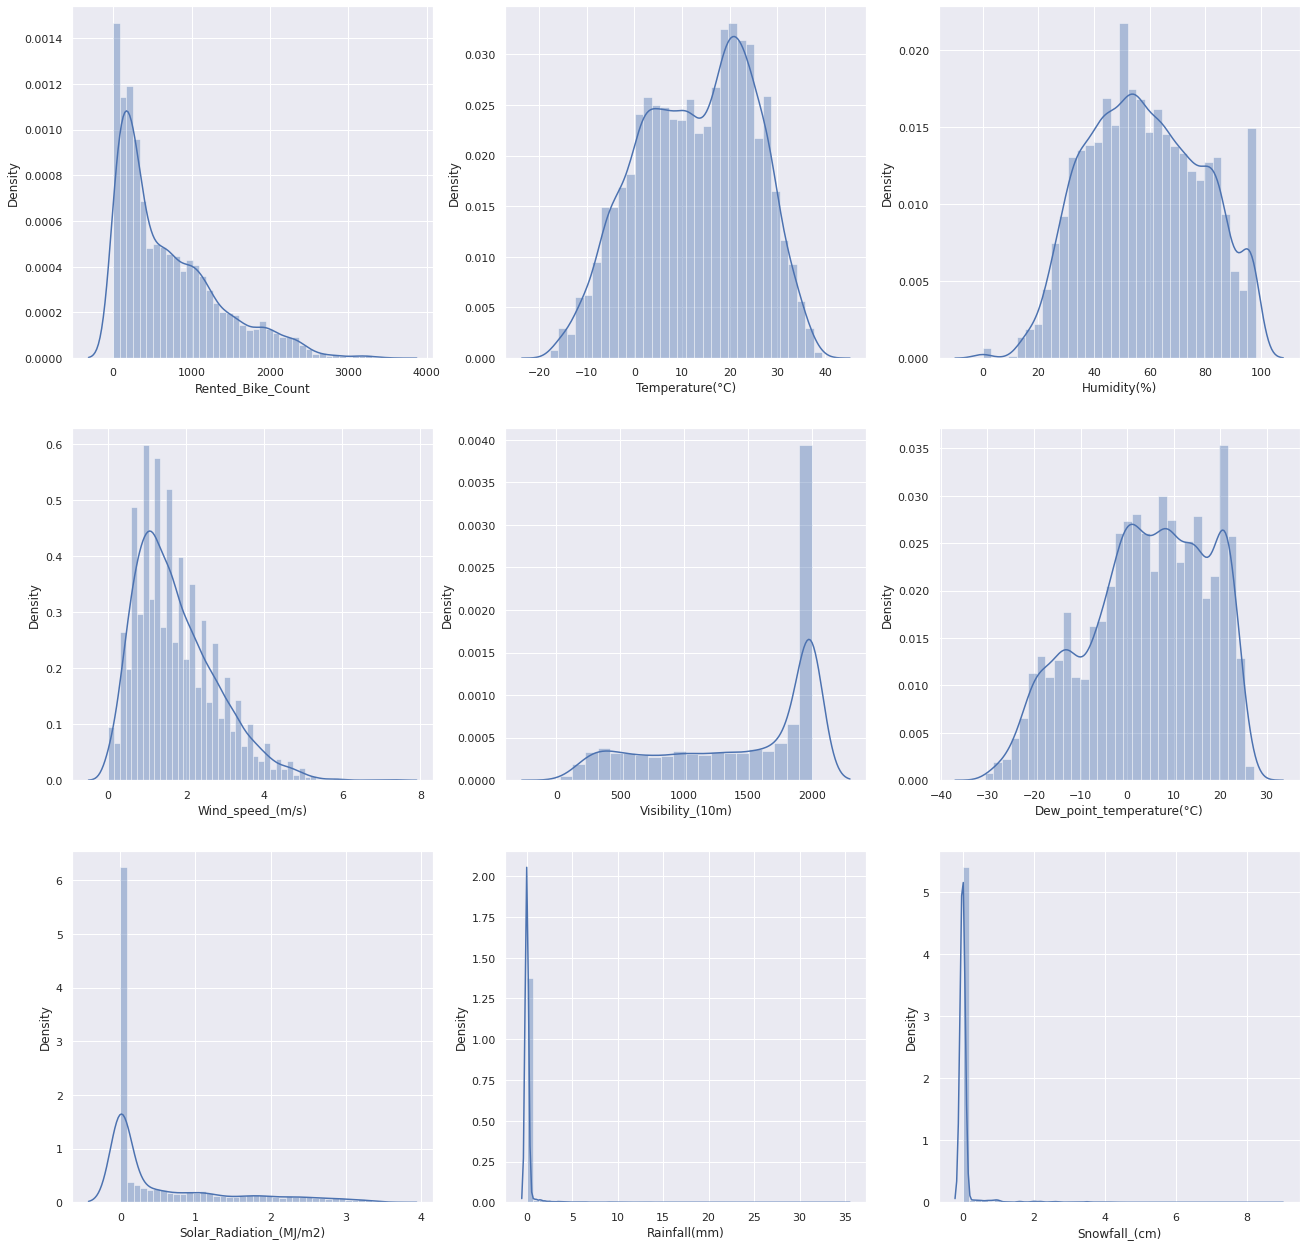

In [17]:
#Distribution plots of independent variables 
plt.figure(figsize = (22,22 ))
sns.set_theme()
for i in enumerate(cc):
    plt.subplot(3, 3,i[0]+1)
    sns.distplot(df[i[1]])

In [18]:
df.corr()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Day,Month,Year
Rented_Bike_Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,2.229091e-02,1.335139e-01,2.151618e-01
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,1.450952e-16,1.749134e-15,2.336763e-14
Temperature(°C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,1.564544e-02,2.161826e-01,3.777958e-01
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,-2.904392e-02,1.398748e-01,3.592468e-02
Wind_speed_(m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-3.197744e-02,-1.567102e-01,-3.780878e-03
Visibility_(10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,-1.017585e-01,6.487420e-02,5.238110e-02
Dew_point_temperature(°C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,1.525311e-04,2.425519e-01,3.363497e-01
Solar_Radiation_(MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-2.981839e-03,-3.159544e-02,1.280860e-01
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-1.623338e-03,1.195810e-02,2.752192e-02
Snowfall_(cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,1.020774e-01,5.312091e-02,-2.064178e-01


Text(0.5, 1.0, 'Count according to Holidays')

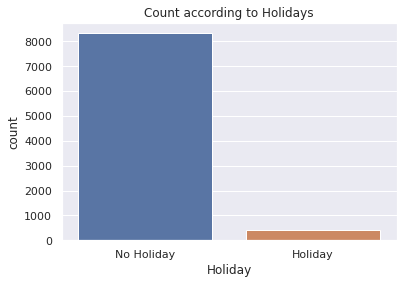

In [19]:
sns.countplot(df['Holiday']).set_title('Count according to Holidays')

Text(0.5, 1.0, 'Demand by Functioning day')

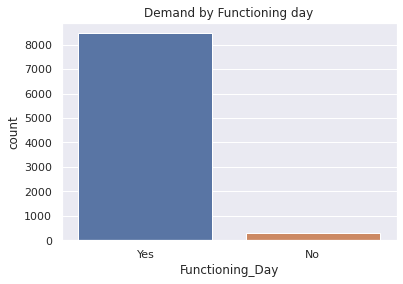

In [20]:
sns.countplot(df['Functioning_Day']).set_title('Demand by Functioning day')

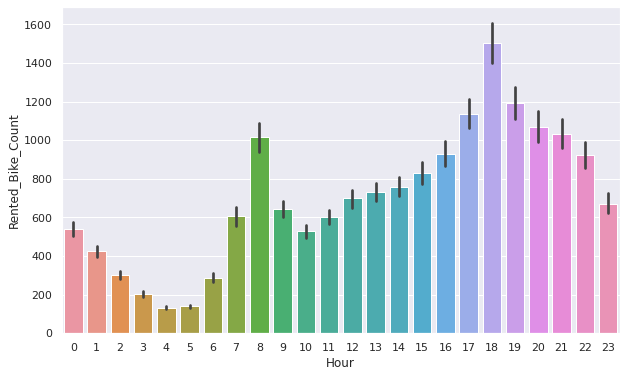

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x='Hour',y='Rented_Bike_Count',data=df)

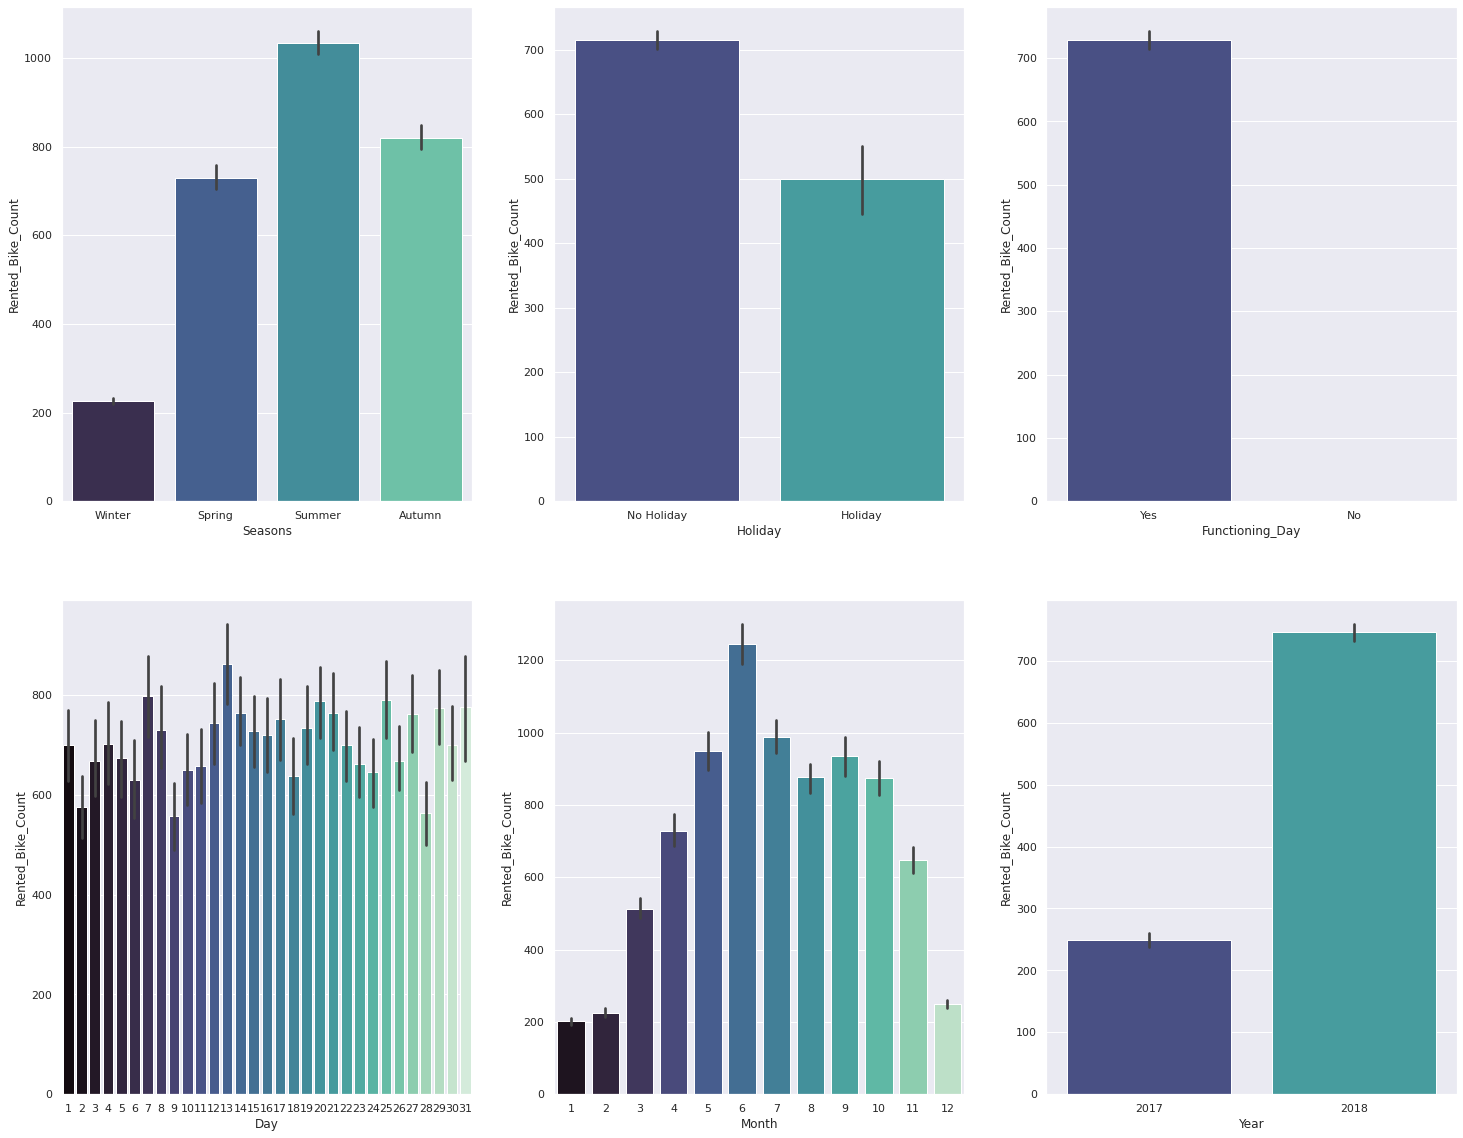

In [22]:
dd= ['Seasons',	'Holiday',	'Functioning_Day',	'Day',	'Month',	'Year']
plt.figure(figsize = (25, 20))
for i in enumerate(dd):
    plt.subplot(2,3,i[0]+1)
    sns.barplot(x=df[i[1]],y='Rented_Bike_Count',data=df,palette='mako')

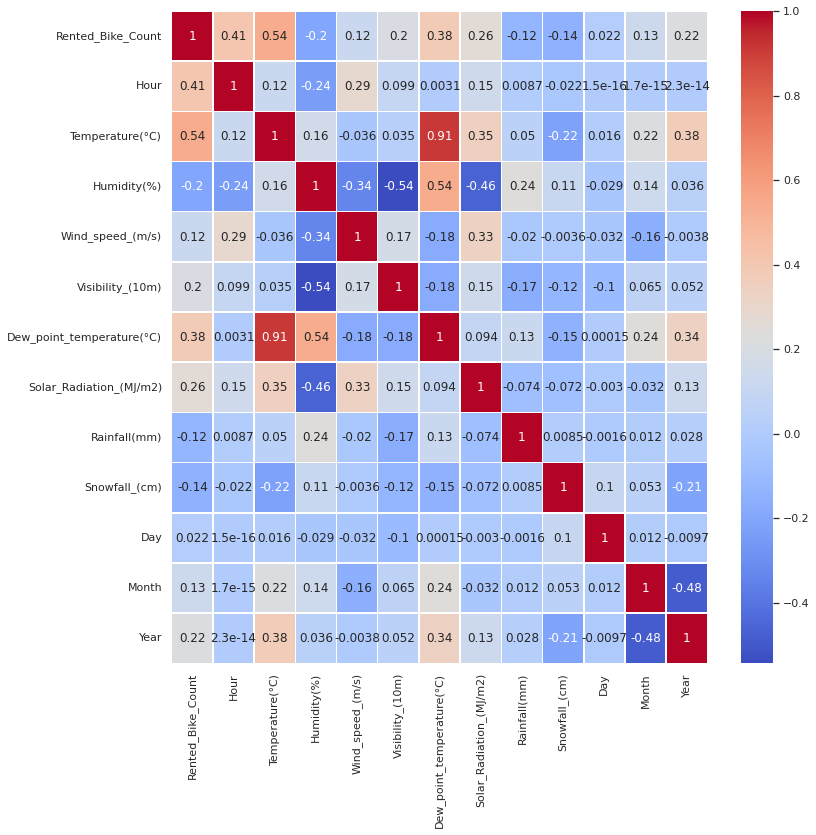

In [23]:
#Corelation map

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, linewidths=.5 , ax=ax,cmap="coolwarm")
plt.show()

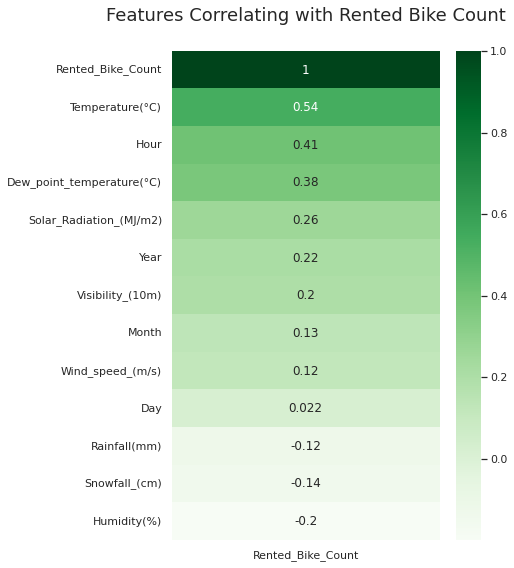

In [24]:
plt.figure(figsize=(6, 9))
heatmap = sns.heatmap(df.corr()[['Rented_Bike_Count']].sort_values(by='Rented_Bike_Count',ascending=False),
                       annot=True,cmap='Greens')
heatmap.set_title('Features Correlating with Rented Bike Count', fontdict={'fontsize':18}, pad=30);

KeyboardInterrupt: ignored

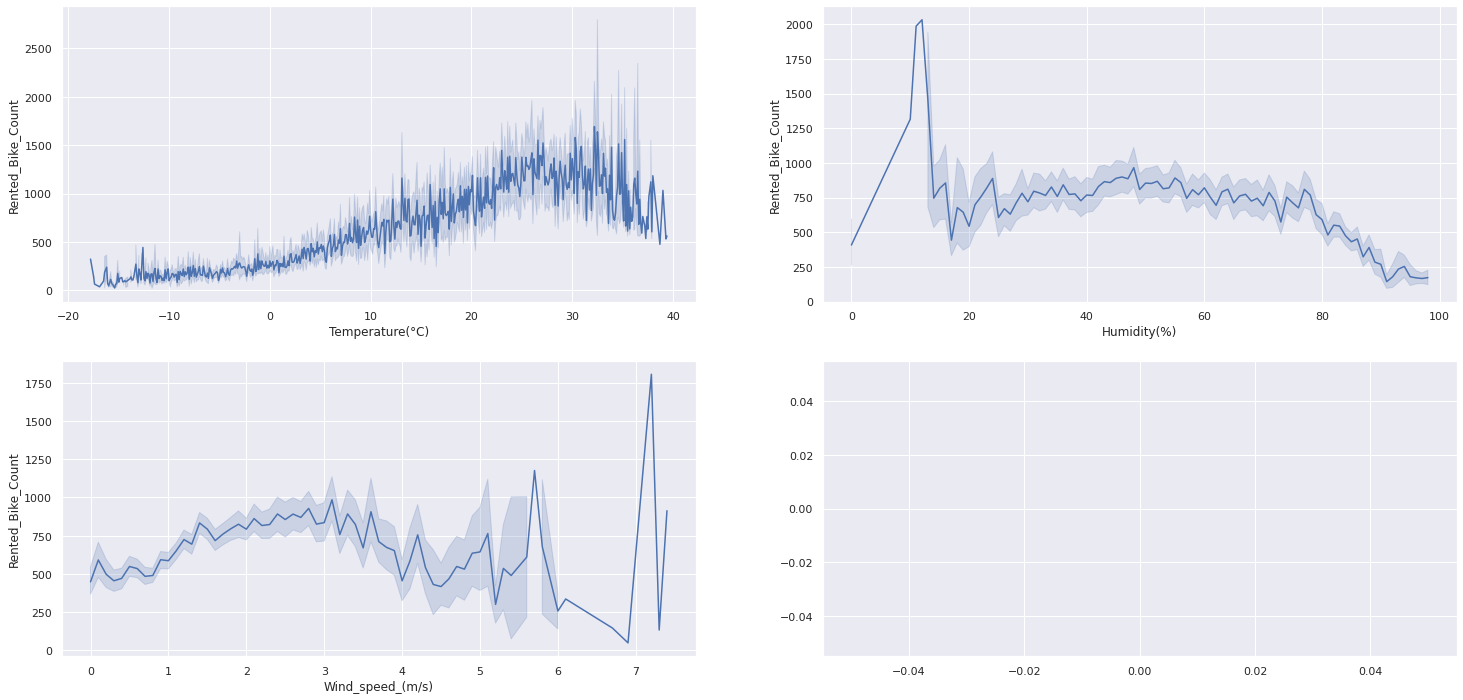

In [25]:
ee = ['Temperature(°C)',	'Humidity(%)',	'Wind_speed_(m/s)',	'Visibility_(10m)',	'Solar_Radiation_(MJ/m2)',	'Rainfall(mm)',	'Snowfall_(cm)']
sns.set_theme(style="darkgrid")
plt.figure(figsize = (25, 25))
for i in enumerate(ee):
  plt.subplot(4,2,i[0]+1)
  sns.lineplot(x=df[i[1]],y='Rented_Bike_Count',data=df,palette='Grouped')

In [ ]:
#Outlier detection graph

lst=[ 'Rented_Bike_Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind_speed_(m/s)', 'Visibility_(10m)', 'Dew_point_temperature(°C)',
       'Solar_Radiation_(MJ/m2)', 'Rainfall(mm)', 'Snowfall_(cm)']
       
plt.figure(figsize = (25, 20))
for i in enumerate(lst):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(x=df[i[1]])

In [27]:
df.groupby('Functioning_Day').count()

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Day,Month,Year
Functioning_Day,,,,,,,,,,,,,,,,
No,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295
Yes,8465,8465,8465,8465,8465,8465,8465,8465,8465,8465,8465,8465,8465,8465,8465,8465


In [28]:
df.groupby('Functioning_Day').sum()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Day,Month,Year
Functioning_Day,,,,,,,,,,,,,
No,0,3333,4747.4,17846,500.6,448855,2292.2,178.41,40.2,0.0,3618,2662,595310
Yes,6172314,97407,108107.0,492216,14609.6,12137739,33394.4,4807.00,1262.3,657.6,134094,54506,17081626


In [29]:
df2=df

In [30]:
df2.drop(['Date','Dew_point_temperature(°C)','Year'],axis=1,inplace=True)

In [31]:
#Converting to categorical variables
catcol=['Hour','Month','Seasons','Holiday','Functioning_Day','Day']
for col in catcol:
  df2[catcol]=df2[catcol].astype('category')

In [32]:
df3=df

In [33]:
#Performing one hot encoding for categorical variables
def create_dummy(dataframe, col):
    dataframe = pd.concat([dataframe, pd.get_dummies(dataframe[col], prefix=col, drop_first=True)], axis=1)
    dataframe = dataframe.drop([col], axis=1)
    return dataframe

for i in catcol:
    df3 = create_dummy(df3, i)


In [34]:
X = df3.drop(columns=['Rented_Bike_Count'], axis=1)
y = (df3['Rented_Bike_Count'])

In [35]:
X.shape

(8760, 76)

In [36]:
y.shape

(8760,)

In [121]:
#Creating function with parameters-model,independent variable dataframe and dependent variable dataframe
def predict(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
    sc=StandardScaler()
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)
    model=ml_model.fit(X_train,y_train)
    y_pred_test=model.predict(X_test)
    y_pred_train=model.predict(X_train)

    print(f'R^2 is {model.score(X_train,y_train)}')
    print(f'Adj R^2 is {1-(1-model.score(X_train,y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)}')
    print(f'RMSE is: {mean_squared_error(y_train,y_pred_train,squared=False)}')
    print(' ')    
    print(f'R^2 is {model.score(X_test,y_test)}')
    print(f'Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}')
    print(f'RMSE is: {mean_squared_error(y_test,y_pred_test,squared=False)}')

In [ ]:
X_train

In [116]:
predict(LinearRegression(),X,y)

R^2 is 0.7000281906437547
Adj R^2 is 0.696517046717823
RMSE is: 353.06427360144045
 
R^2 is 0.7002458783289602
Adj R^2 is 0.6894643765556525
RMSE is: 353.59633110838655


In [117]:
predict(Ridge(),X,y)

R^2 is 0.7000288867488147
Adj R^2 is 0.6965177509707321
RMSE is: 353.06386394632904
 
R^2 is 0.7002261646930106
Adj R^2 is 0.6894439538632278
RMSE is: 353.60795822914343


In [110]:
predict(Lasso(),X,y)

R^2 is 0.6998120477644656
Adj R^2 is 0.6962983739049399
RMSE is: 353.1914498637486
 
R^2 is 0.7004784221040917
Adj R^2 is 0.6897052844230274
RMSE is: 353.4591477080087


In [111]:
predict(DecisionTreeRegressor(),X,y)

R^2 is 1.0
Adj R^2 is 1.0
RMSE is: 0.0
 
R^2 is 0.7407109163828894
Adj R^2 is 0.7313848537445078
RMSE is: 328.8647193801245


In [112]:
predict(RandomForestRegressor(),X,y)

R^2 is 0.9812392632401679
Adj R^2 is 0.981019670448893
RMSE is: 88.29548516738376
 
R^2 is 0.8615786335435036
Adj R^2 is 0.8565999189904068
RMSE is: 240.28504098429


In [43]:
df4=df

In [44]:
df4.drop(['Day', 'Month'],axis=1,inplace=True)

In [45]:
dv=['Hour','Seasons','Holiday','Functioning_Day']

In [46]:
def create_dummy(dataframe, col):
    dataframe = pd.concat([dataframe, pd.get_dummies(dataframe[col], prefix=col, drop_first=True)], axis=1)
    dataframe = dataframe.drop([col], axis=1)
    return dataframe

for i in dv:
    df4 = create_dummy(df4, i)

In [47]:
X1=df4.drop(['Rented_Bike_Count'],axis=1)

In [48]:
y1=df4['Rented_Bike_Count']

In [113]:
#Before parameter tuning
predict(RandomForestRegressor(),X1,y1)

R^2 is 0.9799623189665558
Adj R^2 is 0.979854985199159
RMSE is: 91.2509263461247
 
R^2 is 0.853592837615858
Adj R^2 is 0.8512138911518632
RMSE is: 247.11910939268125


In [114]:
#After parameter tuning
predict(RandomForestRegressor(max_depth=60, min_samples_leaf=15, min_samples_split=90,n_estimators=100),X1,y1)

R^2 is 0.8389608289061459
Adj R^2 is 0.8380982070836351
RMSE is: 258.6898063083852
 
R^2 is 0.8106165705609442
Adj R^2 is 0.8075393096369112
RMSE is: 281.0581328419829


In [115]:
predict(RandomForestRegressor(n_estimators=50, criterion="squared_error",
                              max_depth=20, min_samples_split=60, 
                              min_samples_leaf=1),X1,y1)

R^2 is 0.8739116454302462
Adj R^2 is 0.8732362410210113
RMSE is: 228.9027662395462
 
R^2 is 0.8345117323543347
Adj R^2 is 0.8318227400759697
RMSE is: 262.7294600623398


In [52]:
#Before parameter tuning
predict(GradientBoostingRegressor(),X1,y1)

R^2 is 0.8222259069917872
Adj R^2 is 0.8212736429490435
RMSE is: 271.798958476065
 
R^2 is 0.8037611224253877
Adj R^2 is 0.8005724684258002
RMSE is: 286.0998921059882


In [53]:
#After parameter tuning
predict(GradientBoostingRegressor(n_estimators=400,
                                  criterion='squared_error',
        min_samples_split=50,max_depth=4),X1,y)

R^2 is 0.9128234196482004
Adj R^2 is 0.9123564499034326
RMSE is: 190.33272565624662
 
R^2 is 0.8614119447370785
Adj R^2 is 0.8591600496887023
RMSE is: 240.42967463778515


In [54]:
#Parameters for grid search cv
n_estimators = [40,50,60]
max_depth = [10,20,30]
min_samples_split = [60,70,80]
min_samples_leaf = [1,3,5]

param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestRegressor()
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.25,random_state=0)

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

rf_grid.fit(X_train,y_train)

In [56]:
gb_grid.best_estimator_

NameError: ignored

In [ ]:
rf_grid.best_estimator_

In [58]:
imp=GradientBoostingRegressor().fit(X_train,y_train).feature_importances_

In [59]:
imp

array([3.92529297e-01, 1.52135956e-01, 1.33054057e-03, 4.10148959e-04,
       4.06473849e-02, 3.15087195e-02, 0.00000000e+00, 4.70692791e-04,
       4.92623753e-03, 1.02111387e-02, 1.64573291e-02, 1.36404028e-02,
       3.03687909e-03, 0.00000000e+00, 1.50291435e-02, 0.00000000e+00,
       3.54933546e-03, 1.86485228e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.68783859e-03, 1.64425736e-02,
       7.59248073e-02, 3.73350907e-02, 2.60863330e-02, 2.00286360e-02,
       1.61286750e-02, 6.34229504e-04, 3.39197266e-03, 6.95517327e-05,
       3.38942425e-02, 1.58983550e-03, 7.90381555e-02])

In [60]:
imp_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : imp}

imp_df = pd.DataFrame(imp_dict)
imp_df['Feature Importance'] = round(imp_df['Feature Importance'],2)
imp_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text major ticklabel objects>)

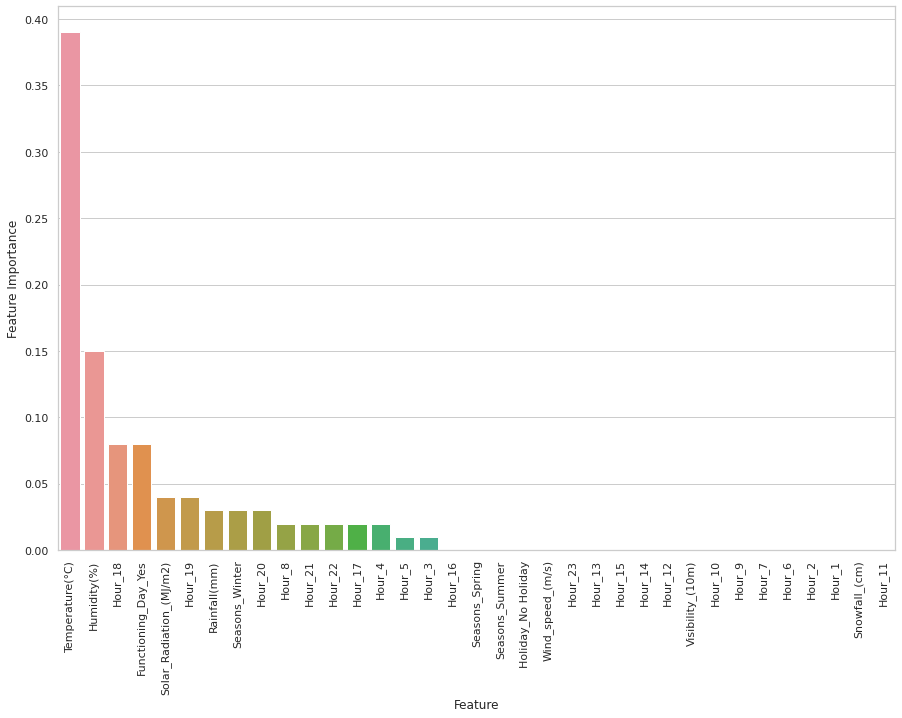

In [61]:
plt.figure(figsize = (15, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Feature', y='Feature Importance', data=imp_df)
plt.xticks(rotation=90)


In [62]:
imp_df.columns

Index(['Feature', 'Feature Importance'], dtype='object')

In [63]:
predict(GradientBoostingRegressor(n_estimators=400,
                                  criterion='squared_error',
        min_samples_split=50,max_depth=4),X1,y)

R^2 is 0.9128234196482004
Adj R^2 is 0.9123564499034326
RMSE is: 190.33272565624662
 
R^2 is 0.8613967931031008
Adj R^2 is 0.859144651858258
RMSE is: 240.44281719490408


In [65]:
#default values of gradient boosting regressor
(loss="squared_error",learning_rate=0.1,n_estimators=100,subsample=1.0,criterion="friedman_mse",
        min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0.0,
        max_depth=3,min_impurity_decrease=0.0,init=None,random_state=None,max_features=None,
        alpha=0.9,verbose=0,max_leaf_nodes=None,warm_start=False,validation_fraction=0.1,
        n_iter_no_change=None, tol=1e-4, ccp_alpha=0.0, )

SyntaxError: ignored

In [66]:
from xgboost import XGBRegressor

In [67]:
predict(XGBRegressor(),X1,y1)

[17:27:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2 is 0.8200665575869811
Adj R^2 is 0.8191027267812793
RMSE is: 273.4446915974029
 
R^2 is 0.802367615047944
Adj R^2 is 0.7991563181708214
RMSE is: 287.1139038264762


In [68]:
XGBRegressor()

XGBRegressor()

In [69]:
predict(XGBRegressor(max_depth=8, learning_rate=0.2, n_estimators=60, verbosity=1, silent=None, 
 objective='reg:linear', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=30, 
 max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=0.9, colsample_bynode=0.9, 
 reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
 base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain'),X1,y1)

[17:27:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2 is 0.914183908024169
Adj R^2 is 0.9137242258663554
RMSE is: 188.84170763022627
 
R^2 is 0.8600181722290426
Adj R^2 is 0.857743629995067
RMSE is: 241.63564418853008


In [70]:
from sklearn.neighbors import KNeighborsRegressor

In [71]:
predict(KNeighborsRegressor(),X1,y1)

R^2 is 0.8450755664053553
Adj R^2 is 0.8442456987628986
RMSE is: 253.73098821491533
 
R^2 is 0.7427014633722571
Adj R^2 is 0.7385206607808128
RMSE is: 327.59994979398704


In [75]:
(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

SyntaxError: ignored

In [74]:
predict(KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=100, 
                            p=2, metric='minkowski', metric_params=None, n_jobs=None),X1,y1)

R^2 is 0.8450755664053553
Adj R^2 is 0.8442456987628986
RMSE is: 253.73098821491533
 
R^2 is 0.7427014633722571
Adj R^2 is 0.7385206607808128
RMSE is: 327.59994979398704


In [77]:
y2=np.sqrt(df['Rented_Bike_Count'])

In [78]:
predict(RandomForestRegressor(max_depth=60, min_samples_leaf=15, min_samples_split=90,n_estimators=100),X1,y2)

R^2 is 0.8729841865746704
Adj R^2 is 0.872303814142793
RMSE is: 4.422584236342988
 
R^2 is 0.8502578144784334
Adj R^2 is 0.8478246777591879
RMSE is: 4.86356191241233


In [79]:
predict(RandomForestRegressor(n_estimators=50, criterion="squared_error",
                              max_depth=20, min_samples_split=60, 
                              min_samples_leaf=1),X1,y2)

R^2 is 0.9013133690984759
Adj R^2 is 0.9007847446599155
RMSE is: 3.8983100544842872
 
R^2 is 0.8710658513788421
Adj R^2 is 0.8689708211087676
RMSE is: 4.513010494784984


In [97]:
predict(GradientBoostingRegressor(n_estimators=100,
                                  criterion='squared_error',
        min_samples_split=60,max_depth=8),X1,y2)

R^2 is 0.907166158168789
Adj R^2 is 0.9066688847583065
RMSE is: 3.7809451621373094
 
R^2 is 0.8811033742727685
Adj R^2 is 0.8791714420998562
RMSE is: 4.333782682137204


In [125]:
gbr=GradientBoostingRegressor(n_estimators=100,
                                  criterion='squared_error',
        min_samples_split=50,min_samples_leaf=40,max_depth=8)

In [127]:
X_train,X_test,y_train,y_test=train_test_split(X1,y2,test_size=0.25,random_state=0)
model=gbr.fit(X_train,y_train)
y_p_test=model.predict(X_test)
y_p_train=model.predict(X_train)
print(f'R^2 is {model.score(X_train,y_train)}')
print(f'Adj R^2 is {1-(1-model.score(X_train,y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)}')
print(f'RMSE is: {mean_squared_error(y_train,y_p_train,squared=False)}')
print(' ')    
print(f'R^2 is {model.score(X_test,y_test)}')
print(f'Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}')
print(f'RMSE is: {mean_squared_error(y_test,y_p_test,squared=False)}')

R^2 is 0.9227458541280054
Adj R^2 is 0.9223320348587186
RMSE is: 3.4491184906945027
 
R^2 is 0.8864190944215673
Adj R^2 is 0.8845735365314813
RMSE is: 4.235795927909868


In [157]:
#function y_pred and y_test

i= int(input("Enter Number: "))
b=X_test.iloc[i].to_list()
X_train,X_test,y_train,y_test=train_test_split(X1,y2,test_size=0.25,random_state=0)
model=gbr.fit(X_train,y_train)
y_p_test=model.predict(X_test)
print(y_p_test[i])
ll=y_test.to_list()
print(ll[i])

Enter Number: 8
33.34827616350997
34.95711658589707


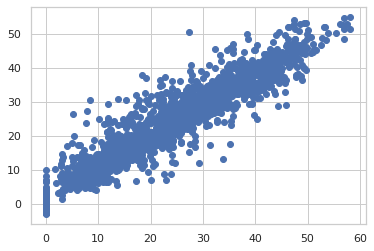

In [131]:
plt.scatter(x=y_test,y=y_p_test)